# Libraries & Functions

In [1]:
'''Math & Data Libraries'''
import numpy as np
import pandas as pd

In [2]:
'''Visualization Libraries'''
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

sns.set_style("whitegrid", {"grid.color": "0.5", "axes.edgecolor": "0.2"})
color_palette = [ "#007597", "#FF8853", "#C1C36D", "#FFE174","#00A697", "#BC97E0", "#ffc0bf"]
sns.set_palette(sns.color_palette(color_palette))

# Input Data

In [186]:
df_trait_summary_dict = {}
df_trait_summary_dict["GIFT"] = pd.read_csv('../Datasets/Initial Databases/GIFT_traits.csv').drop_duplicates(["work_ID", "trait_ID"])
df_trait_summary_dict["TRY"] = pd.read_csv('../Datasets/Papers/trait_summary_overall.csv', encoding="cp1252")
# df_trait_summary_dict["TRY"] = df_trait_summary_dict["GBIF"][df_trait_summary_dict["TRY"]['TraitName'].map(df_trait_summary_dict["GBIF"]["TraitName"].value_counts()) > df_trait_summary_dict["GBIF"]["TraitName"].value_counts()[109]]

C:\Users\Admin\AppData\Local\Temp\ipykernel_171224\390116488.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trait_summary_dict["GIFT"] = pd.read_csv('../Datasets/Initial Databases/GIFT_traits.csv').drop_duplicates(["work_ID", "trait_ID"])


In [187]:
plant_trait_counts_dict = {}
trait_plant_counts_dict = {}

plant_trait_counts_dict["GIFT"] = df_trait_summary_dict["GIFT"]["work_ID"].value_counts()
trait_plant_counts_dict["GIFT"] = df_trait_summary_dict["GIFT"]["trait_ID"].value_counts()

plant_trait_counts_dict["TRY"] = df_trait_summary_dict["GBIF"]["AccSpeciesName"].value_counts()
trait_plant_counts_dict["TRY"] = df_trait_summary_dict["GBIF"]["TraitName"].value_counts()

In [188]:
for df_name in df_trait_summary_dict.keys():
    print(df_name, len(plant_trait_counts_dict[df_name]), len(trait_plant_counts_dict[df_name]))

GIFT 291832 109
GBIF 130305 1918


In [189]:
for df_name in df_trait_summary_dict.keys():
    plant_trait_counts_dict[df_name] = pd.concat([plant_trait_counts_dict[df_name], pd.Series([0 for i in range(len(plant_trait_counts_dict[df_name]), 380000)], index=[f"species_{i}" for i in range(len(plant_trait_counts_dict[df_name]), 380000)])])

In [190]:
for df_name in df_trait_summary_dict.keys():
    print(df_name, len(plant_trait_counts_dict[df_name]))

GIFT 380000
GBIF 380000


In [225]:
for df_name in df_trait_summary_dict.keys():
    print(df_name)
    for threshold in [0, 1, 10, 50]:
        print(threshold, np.sum(plant_trait_counts_dict[df_name]>=threshold), np.round(np.mean(plant_trait_counts_dict[df_name]>=threshold), 2), 10000*np.round(np.mean(plant_trait_counts_dict[df_name]>=threshold), 2))
    print()

GIFT
0 380000 1.0 10000.0
1 291832 0.77 7700.0
10 139897 0.37 3700.0
50 939 0.0 0.0

GBIF
0 380000 1.0 10000.0
1 130305 0.34 3400.0000000000005
10 32866 0.09 900.0
50 6331 0.02 200.0



In [226]:
for df_name in df_trait_summary_dict.keys():
    print(df_name)
    for threshold in [1, 100, 1000, 10000]:
        print(threshold, np.sum(trait_plant_counts_dict[df_name]>=threshold), np.round(np.mean(trait_plant_counts_dict[df_name]>=threshold), 2), 10000*np.round(np.mean(trait_plant_counts_dict[df_name]>=threshold), 2))
    print()

GIFT
1 109 1.0 10000.0
100 100 0.92 9200.0
1000 79 0.72 7200.0
10000 37 0.34 3400.0000000000005

GBIF
1 1918 1.0 10000.0
100 573 0.3 3000.0
1000 245 0.13 1300.0
10000 24 0.01 100.0



In [130]:
palette_plants = ["#EEEEEE", "#d3d598", "#C1C36D", "#9a9c57"]

GIFT
0 380000
1 291832
10 139897
50 939


C:\Users\Admin\AppData\Local\Temp\ipykernel_171224\688443121.py:11: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((-0.25,-0.25), max_R+0.5, max_R+0.5, color = "#e6e7c4", alpha=1, fill = None, linewidth = 10, edgecolor = "#9a9c57")


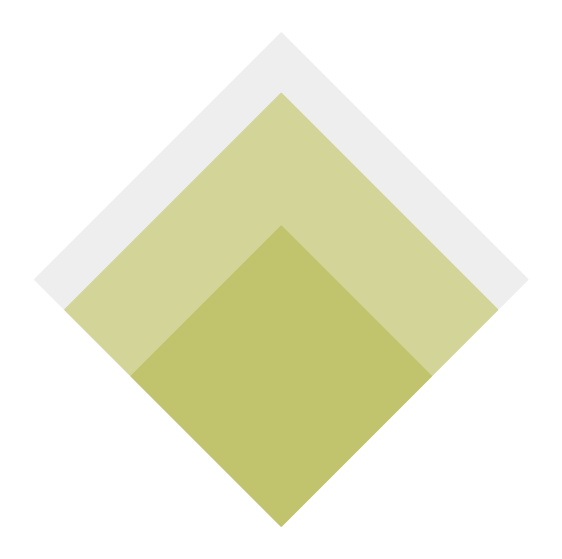

GBIF
0 380000
1 130305
10 32866
50 6331


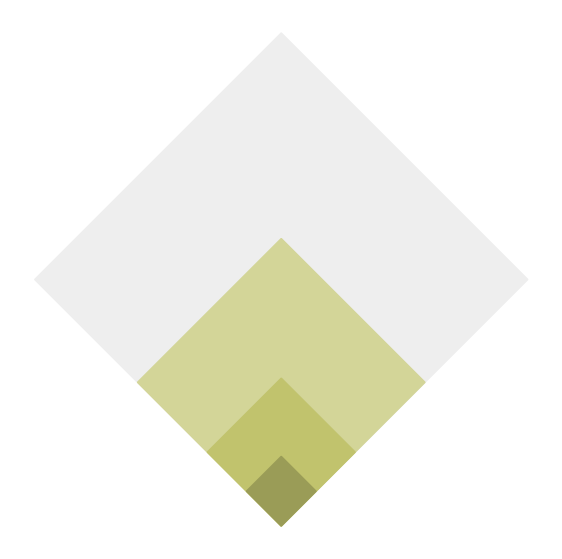

In [224]:
import matplotlib.patches as patches
import matplotlib as mpl


for df_name in df_trait_summary_dict.keys():
    print(df_name)
    fig, ax = plt.subplots(figsize=(7,7))

    max_R = 100

    rect = patches.Rectangle((-0.25,-0.25), max_R+0.5, max_R+0.5, color = "#e6e7c4", alpha=1, fill = None, linewidth = 10, edgecolor = "#9a9c57")
    t2 = mpl.transforms.Affine2D().rotate_deg(45) + ax.transData
    rect.set_transform(t2)


    for i, threshold in enumerate([0, 1, 10, 50]):
        print(threshold, np.sum(plant_trait_counts_dict[df_name]>=threshold))
        side_length = max_R*np.round(np.mean(plant_trait_counts_dict[df_name]>=threshold), 2)**0.5
        rect = patches.Rectangle((0,0), side_length, side_length, color = palette_plants[i], alpha=1)
        t2 = mpl.transforms.Affine2D().rotate_deg(45) + ax.transData
        rect.set_transform(t2)
        ax.add_patch(rect)
        # break

    # ax.add_patch(rect)
    # blank_rect = patches.Rectangle((0, -3), 75, 150, color = "white", alpha=1)
    # ax.add_patch(blank_rect)
    plt.axis("equal")
    # plt.xlim(-max_R, max_R)
    # plt.ylim(25, 20)

    plt.axis("off")
    plt.show()

In [221]:
palette_traits = ["#EEEEEE", "#4c9eb6", "#007597", "#005d78"]

GIFT
1 109
100 100
1000 79
10000 37


C:\Users\Admin\AppData\Local\Temp\ipykernel_171224\128203145.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((-0.25,-0.25), max_R+0.5, max_R+0.5, color = "#99c7d5", alpha=1, fill = None, linewidth = 10, edgecolor = "#9a9c57")


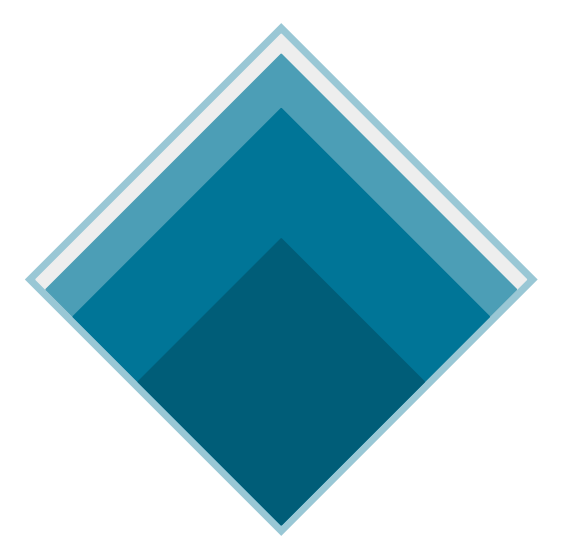

GBIF
1 1918
100 573
1000 245
10000 24


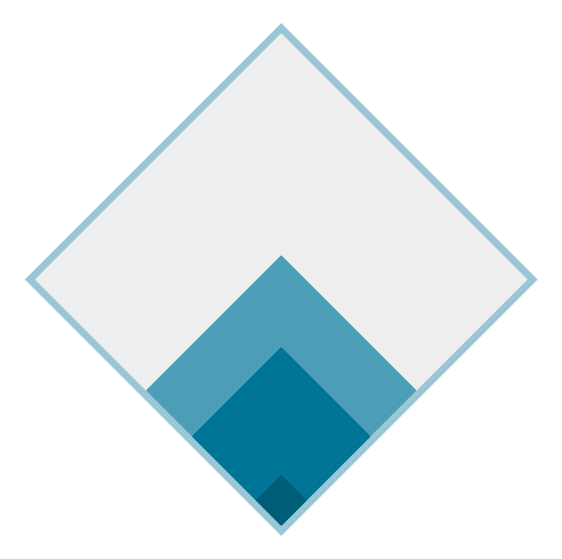

In [223]:
import matplotlib.patches as patches
import matplotlib as mpl

for df_name in df_trait_summary_dict.keys():
    print(df_name)
    fig, ax = plt.subplots(figsize=(7,7))

    max_R = 100

    rect = patches.Rectangle((-0.25,-0.25), max_R+0.5, max_R+0.5, color = "#99c7d5", alpha=1, fill = None, linewidth = 10, edgecolor = "#9a9c57")
    t2 = mpl.transforms.Affine2D().rotate_deg(45) + ax.transData
    rect.set_transform(t2)
    ax.add_patch(rect)

    for i, threshold in enumerate([1, 100, 1000, 10000]):
        print(threshold, np.sum(trait_plant_counts_dict[df_name]>=threshold))
        side_length = max_R*np.round(np.mean(trait_plant_counts_dict[df_name]>=threshold), 2)**0.5
        rect = patches.Rectangle((0,0), side_length, side_length, color = palette_traits[i], alpha=1)
        t2 = mpl.transforms.Affine2D().rotate_deg(45) + ax.transData
        rect.set_transform(t2)
        ax.add_patch(rect)
        # break
    plt.axis("equal")
    # plt.xlim(-max_R, max_R)
    # plt.ylim(25, 20)

    plt.axis("off")
    plt.show()